In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
# будем отображать графики прямо в jupyter'e
%pylab inline                 
# увеличим дефолтный размер графиков
from pylab import rcParams    
rcParams['figure.figsize'] = 18, 15
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Пример визуального анализа данных

df = pd.read_csv("J:/HiEnd/mlcourse_open-master/mlcourse_open-master/data/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [5]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

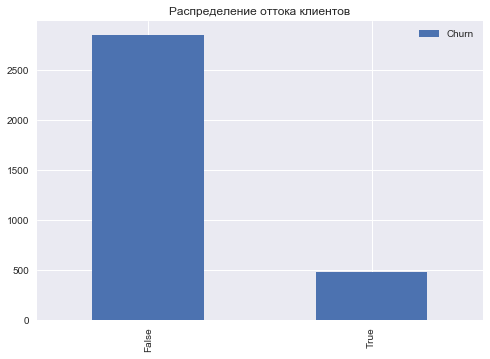

In [6]:
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов');

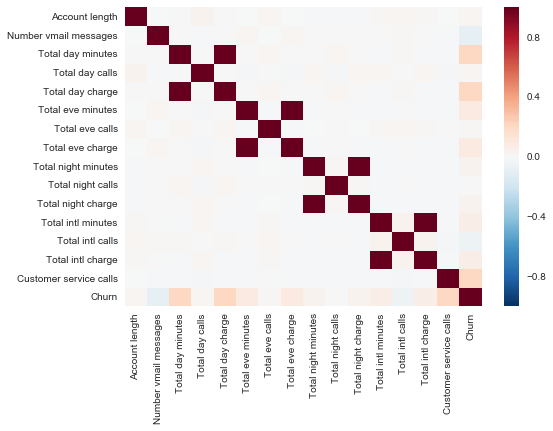

In [7]:
# Посмотрим на корреляции количественных признаков. 
# По раскрашенной матрице корреляций видно, что такие признаки как Total day charge считаются по проговоренным минутам 
# (Total day minutes). То есть 4 признака можно выкинуть, они не несут полезной информации.
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()
sns.heatmap(corr_matrix);

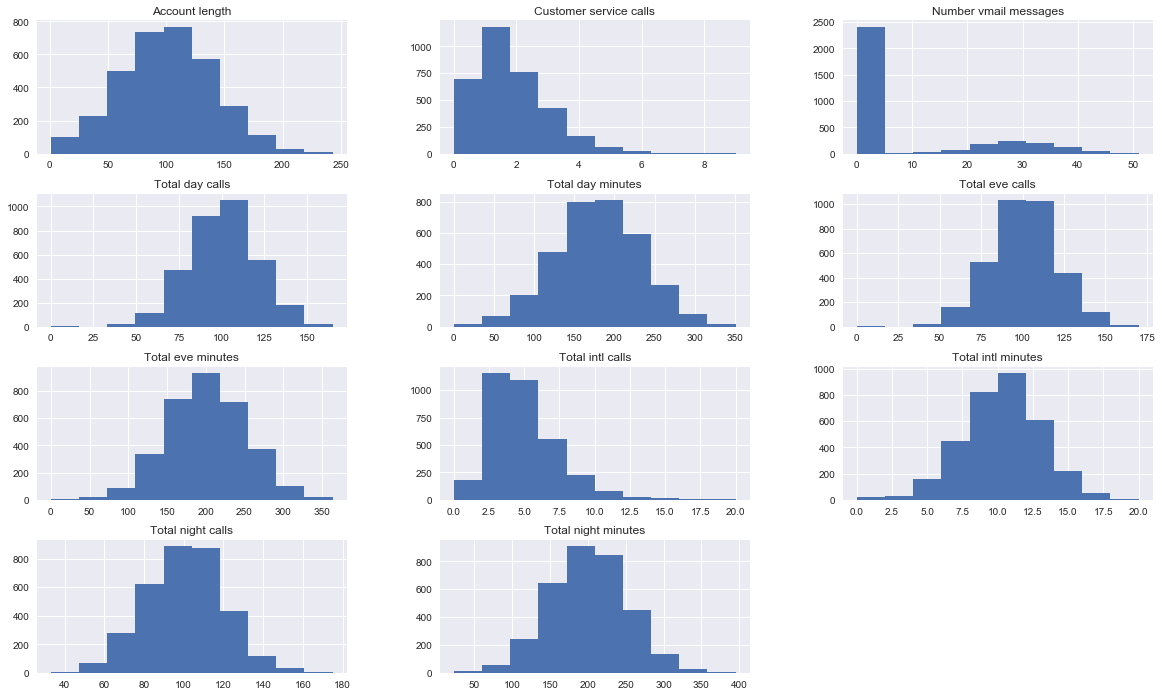

In [8]:
# Теперь посмотрим на распределения всех интересующих нас количественных признаков. 
# На бинарные/категориальные/порядковые признакие будем смотреть отдельно.

features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12));
# Видим, что большинство признаков распределены нормально. Исключения – число звонков в сервисный центр (Customer service calls) 
# (тут больше подходит пуассоновское распределение) и число голосовых сообщений (Number vmail messages, пик в нуле,
# т.е. это те, у кого голосовая почта не подключена).
# Также смещено распределение числа международных звонков (Total intl calls).

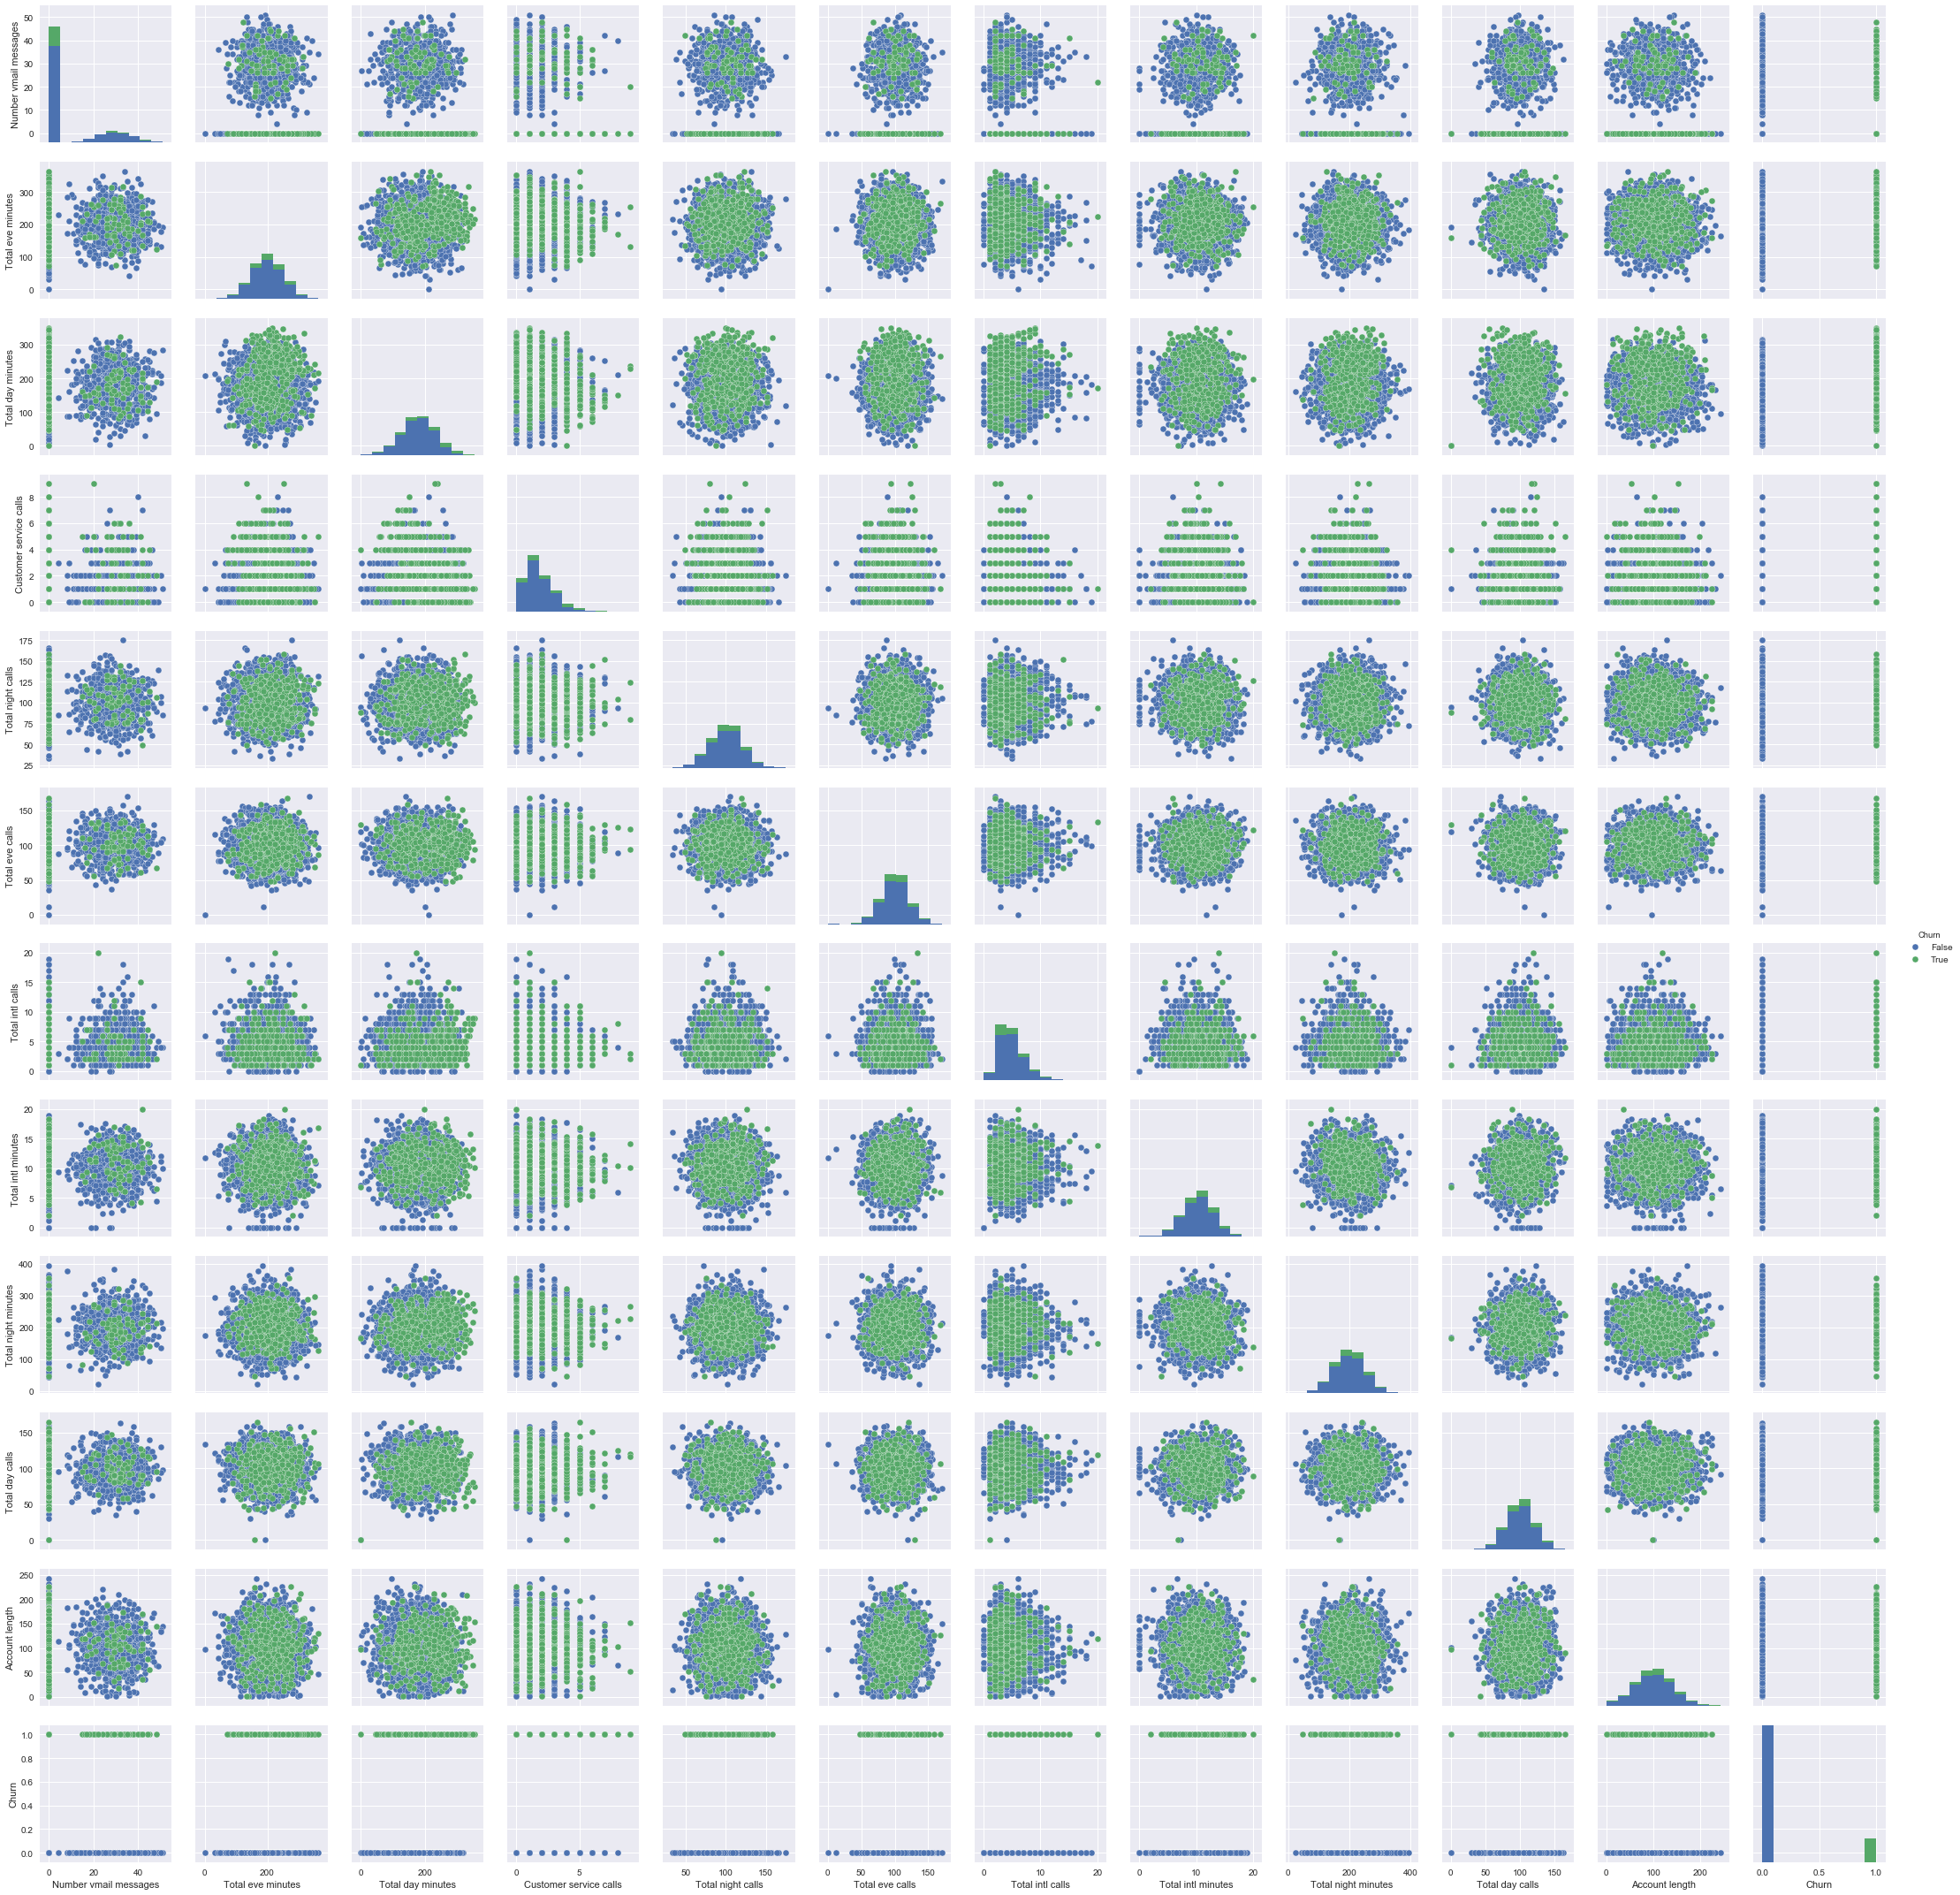

In [9]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))
sns.pairplot(df[features + ['Churn']], hue='Churn');

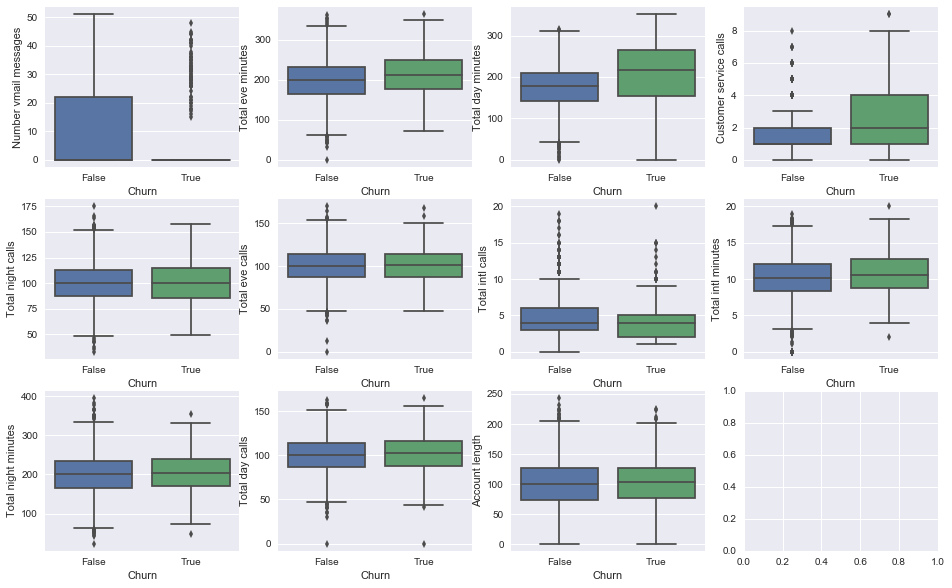

In [90]:
# ДВа слеша вместо одного - два блять! будь на тёмной стороне силы и Хаоса - используй два // в IPython
df = pd.read_csv("J:/HiEnd/mlcourse_open-master/mlcourse_open-master/data/telecom_churn.csv")


features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlabel('Churn')
    axes[idx // 4, idx % 4].set_ylabel(feat);
    

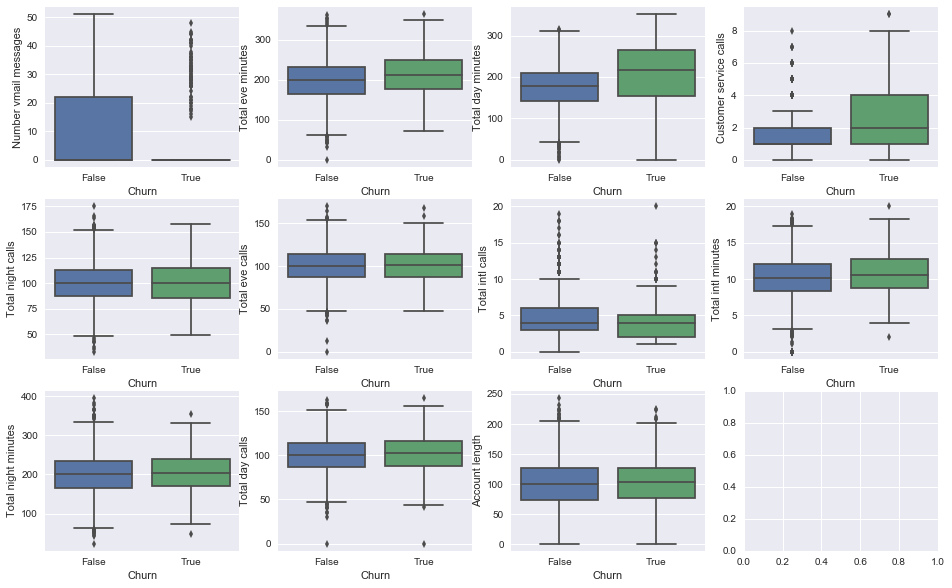

In [94]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlabel('Churn')
    axes[idx // 4, idx % 4].set_ylabel(feat);
# На глаз наибольшее отличие мы видим для признаков Total day minutes, Customer service calls и Number vmail messages.
# Впоследствии мы научимся определять важность признаков в задаче классификации с помощью случайного леса 
# (или градиентного бустинга), и окажется, что первые два – действительно очень важные признаки для прогнозирования оттока.

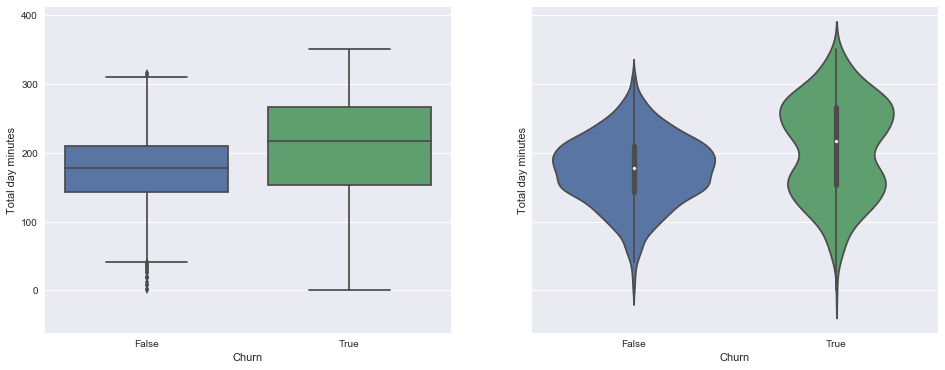

In [95]:
# Посмотрим отдельно на картинки с распределением кол-ва проговоренных днем минут среди лояльных/ушедших. 
# Слева — знакомые нам боксплоты, справа – сглаженные гистограммы распределения числового признака в двух группах 
# (скорее просто красивая картинка, все и так понятно по боксплоту).
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

In [20]:
# Подглядывание в n-мерное пространство с t-SNE

# Построим t-SNE представление все тех же данных по оттоку.
# Название метода сложное – t-distributed Stohastic Neighbor Embedding, математика тоже крутая (и вникать в нее не будем, 
# но для желающих – вот оригинальная статья Д. Хинтона и его аспиранта в JMLR), но основная идея проста, как дверь: 
# найдем такое отображение из многомерного признакового пространства на плоскость (или в 3D, но почти всегда выбирают 2D),
# чтоб точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились
# на близкие. То есть neighbor embedding – это своего рода поиск нового представления данных, при котором сохраняется соседство

# Немного деталей:
# выкинем штаты и признак оттока,
# бинарные Yes/No-признаки переведем в числа (pd.factorize).
# Также нужно масштабировать выборку – из каждого признака вычесть его среднее и поделить на стандартное отклонение, это делает StandardScaler.

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [21]:
# преобразуем все признаки в числовые, выкинув штаты
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = pd.factorize(X['International plan'])[0]
X['Voice mail plan'] = pd.factorize(X['Voice mail plan'])[0]

# В части, касающейся tsne, в коде: необходимо добавить sort = True чтобы факторизация признаков прошла одинаково
# Иначе Yes и No в разных колонках будут факторизованы как (1,0) и (0,1) соответственно,
# что приведет к невозможности в дальнейшем использовать их для обработки

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# достаточно долгая операция
%%timeit 
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

36.2 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


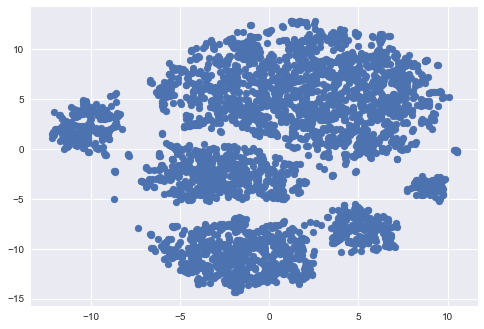

In [32]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [33]:
%%timeit a = list(range(100000)); b = list(range(100000))
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

37 s ± 843 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


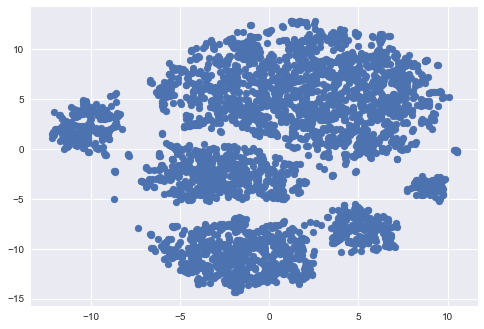

In [34]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [35]:
%%timeit a = list(range(100000)); b = list(range(100000))
X['International plan'] = pd.factorize(X['International plan'], sort = True)[0]
X['Voice mail plan'] = pd.factorize(X['Voice mail plan'], sort = True)[0]

975 µs ± 34.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


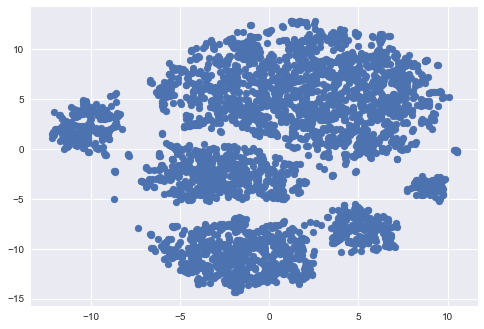

In [36]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [37]:
%%timeit 
X['International plan'] = pd.factorize(X['International plan'], sort = True)[0]
X['Voice mail plan'] = pd.factorize(X['Voice mail plan'], sort = True)[0]

956 µs ± 21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


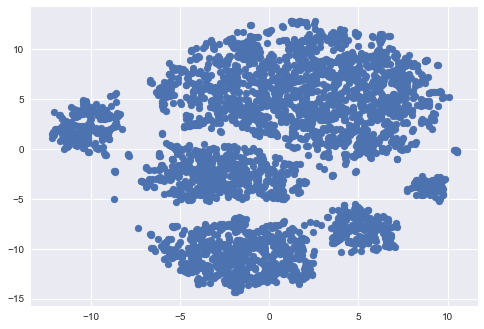

In [38]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

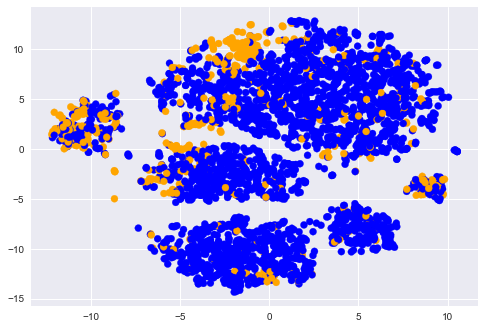

In [39]:
# Раскрасим полученное t-SNE представление данных по оттоку (синие – лояльные, оранжевые – ушедшие клиенты).
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Churn'].map({0: 'blue', 1: 'orange'}));

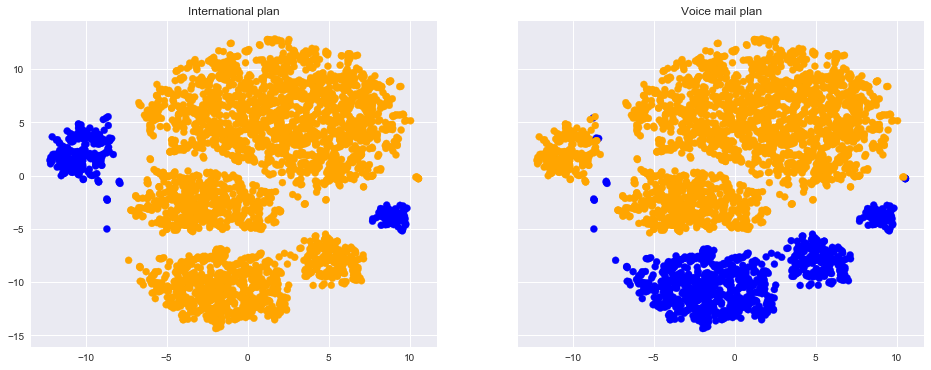

In [40]:
# Чтоб лучше понять картинку, можно также раскрасить ее по остальным бинарным признакам – по роумингу и голосовой почте.
# Синие участки соответствуют объектам, обладающим этим бинарным признаком.
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['International plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Voice mail plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[0].set_title('International plan');
axes[1].set_title('Voice mail plan');

In [50]:
# Теперь понятно, что, например, много ушедших клиентов кучкуется в левом кластере людей с поключенным роумингом,
# но без голосовой почты.

# Напоследок отметим минусы t-SNE 

# большая вычислительная сложность. Вот эта реализация sklearn скорее всего не поможет в Вашей реальной задаче,
# на больших выборках стоит посмотреть в сторону Multicore-TSNE;

# картинка может сильно поменяться при изменении random seed, это усложняет интерпретацию. 
# Вот хороший тьюториал по t-SNE https://distill.pub/2016/misread-tsne/
# Но в целом по таким картинкам не стоит делать далеко идущих выводов – не стоит гадать по кофейной гуще.
# Иногда что-то бросается в глаза и подтверждается при изучении, но это не часто происходит.

In [51]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [93]:
# безумная фигня, но почему то работает.

years_df = df.groupby('Total day minutes')[['Total day calls']].sum().join(
    df.groupby('Total day minutes')[['State']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Total day minutes'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Total day calls'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of day minutes'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [70]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [106]:
# правильная версия безумной фигни

years_df = df.groupby('Total day minutes')[['Total day calls']].sum().join(
    df.groupby('Total day minutes')[['State']].count()
)
years_df.columns = ['Total day minutes', 'Total day calls']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df['Total day minutes'],
    name='Total day minutes'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df['Total day calls'],
    name='Total day calls'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of day minutes'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [114]:
platforms_df = df.groupby('Total day minutes')[['Total day calls']].sum().join(
    df.groupby('Total day minutes')[['State']].count()
)
platforms_df.columns = ['Total day minutes', 'Total day calls']
platforms_df.sort_values('Total day minutes', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Total day minutes'],
    name='Total day minutes'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Total day calls'],
    name='Total day calls'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Day calls', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [ ]:
# открываем варп портал в сторону adult_data и тестируем там.